# Simple Visuals

At this point we have data for different players:

* Player Name
* Player ID
* Handedness
* Position
* Age

As well as their contracts:

* Length
* Signing date
* Signing age
* Percentage of the cap
* Status when they signed
* Type of contract

And game stats. 

We still have many here that need to be organized! 

Currently comes from 5 tables (that have been condensed down to 1 for ease of use):

* GAR stats
* On-ice stats at even strength
* Relative_TM (?) stats at even strength
* Standard stats at even strength
* Standard stats on the PP

Let's just look through these a bit



In [2]:
# Standard Stuff
import pandas as pd
import numpy as np
import scipy as sp

# Visual Stuff
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [3]:
game_stats_path = './data/game_stats_matched.csv'
game_stats = pd.read_csv(game_stats_path)
game_stats = game_stats[game_stats.player_id!=-1].reset_index(drop=True)
display(game_stats.info())
game_features = list(game_stats.columns)
n_cols = len(game_features)
print('-'*(5*25))
print('ALL GAME FEATURES')
print('-'*(5*25))
for ii in range(int(n_cols/5)):
    print('{: <25}{: <25}{: <25}{: <25}{: <25}'.format(game_features[5*ii], game_features[5*ii+1], game_features[5*ii+2], game_features[5*ii+3], game_features[5*ii+4]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Columns: 110 entries, player_id to WAR
dtypes: float64(87), int64(20), object(3)
memory usage: 6.7+ MB


None

-----------------------------------------------------------------------------------------------------------------------------
ALL GAME FEATURES
-----------------------------------------------------------------------------------------------------------------------------
player_id                player                   season                   position                 player_season            
G_EV                     A1_EV                    A2_EV                    Points_EV                iSF_EV                   
iCF_EV                   iBLK_EV                  iHF_EV                   iHA_EV                   GIVE_EV                  
TAKE_EV                  iPENT2_EV                iPEND2_EV                iPENT5_EV                iPEND5_EV                
G_p60_EV                 A1_p60_EV                A2_p60_EV                Points_p60_EV            iSF_p60_EV               
iCF_p60_EV               iBLK_p60_EV              iHF_p60_EV               iHA_p60_EV               

In [4]:
game_stats.describe()

player_id        season         G_EV        A1_EV        A2_EV  \
count  7976.000000  7.976000e+03  7976.000000  7976.000000  7976.000000   
mean   1034.082372  2.013013e+07     6.016424     5.679037     4.489594   
std     617.097512  3.264467e+04     5.843549     5.010689     3.614168   
min       0.000000  2.007201e+07     0.000000     0.000000     0.000000   
25%     520.000000  2.010201e+07     1.000000     2.000000     2.000000   
50%    1125.000000  2.013201e+07     4.000000     5.000000     4.000000   
75%    1498.000000  2.016202e+07     9.000000     8.000000     7.000000   
max    2504.000000  2.018202e+07    45.000000    33.000000    25.000000   

         Points_EV       iSF_EV       iCF_EV      iBLK_EV       iHF_EV  \
count  7976.000000  7976.000000  7976.000000  7976.000000  7976.000000   
mean     16.185055    76.376505   141.782974    35.609453    66.266048   
std      12.581326    50.242305    89.013629    31.768628    50.679668   
min       0.000000     0.000000     2.000000     0.000000     0.000000   
25%       6.000000    36.000000    70.000000    13.000000    28.000000   
50%      14.000000    71.000000   136.000000    25.000000    54.000000   
75%      24.000000   110.000000   201.000000    47.000000    92.000000   
max      77.000000   326.000000   659.000000   241.000000   379.000000   

            iHA_EV      GIVE_EV      TAKE_EV    iPENT2_EV    iPEND2_EV  \
count  7976.000000  7976.000000  7976.000000  7976.000000  7976.000000   
mean     65.750125    20.657347    18.177909     9.383902     8.630015   
std      38.095931    15.865882    14.158231     6.805184     6.877369   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      37.000000     8.000000     7.000000     4.000000     3.000000   
50%      63.000000    18.000000    15.000000     8.000000     7.000000   
75%      90.000000    30.000000    27.000000    13.000000    12.000000   
max     283.000000   121.000000   112.000000    57.000000    60.000000   

         iPENT5_EV    iPEND5_EV     G_p60_EV    A1_p60_EV    A2_p60_EV  \
count  7976.000000  7976.000000  7976.000000  7976.000000  7976.000000   
mean      1.047768     1.042879     0.449330     0.415742     0.326648   
std       2.411072     2.379203     0.364021     0.303976     0.227460   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.144713     0.192019     0.178651   
50%       0.000000     0.000000     0.392520     0.377959     0.314100   
75%       1.000000     1.000000     0.697850     0.595302     0.452139   
max      27.000000    24.000000     3.450259     3.407800     2.942138   

       Points_p60_EV   iSF_p60_EV   iCF_p60_EV  iBLK_p60_EV   iHF_p60_EV  \
count    7976.000000  7976.000000  7976.000000  7976.000000  7976.000000   
mean        1.191720     5.923026    10.903901     2.702713     5.916848   
std         0.652832     2.310499     3.421982     1.586410     4.251418   
min         0.000000     0.000000     1.845775     0.000000     0.000000   
25%         0.701288     4.120077     8.446984     1.468404     2.798106   
50%         1.111931     5.778979    10.585795     2.300286     4.807389   
75%         1.647202     7.503632    13.090927     3.778296     7.901483   
max         4.830140    16.337161    30.989161    10.250569    32.094022   

        iHA_p60_EV  GIVE_p60_EV  TAKE_p60_EV  iPENT2_p60_EV  iPEND2_p60_EV  \
count  7976.000000  7976.000000  7976.000000    7976.000000    7976.000000   
mean      5.531081     1.532218     1.391999       0.791099       0.711842   
std       2.164352     0.747325     0.785760       0.584599       0.525504   
min       0.000000     0.000000     0.000000       0.000000       0.000000   
25%       3.972013     1.021950     0.815646       0.436306       0.352324   
50%       5.278289     1.447103     1.309199       0.679012       0.615171   
75%       6.788120     1.970943     1.871337       0.992795       0.959151   
max      17.567831     

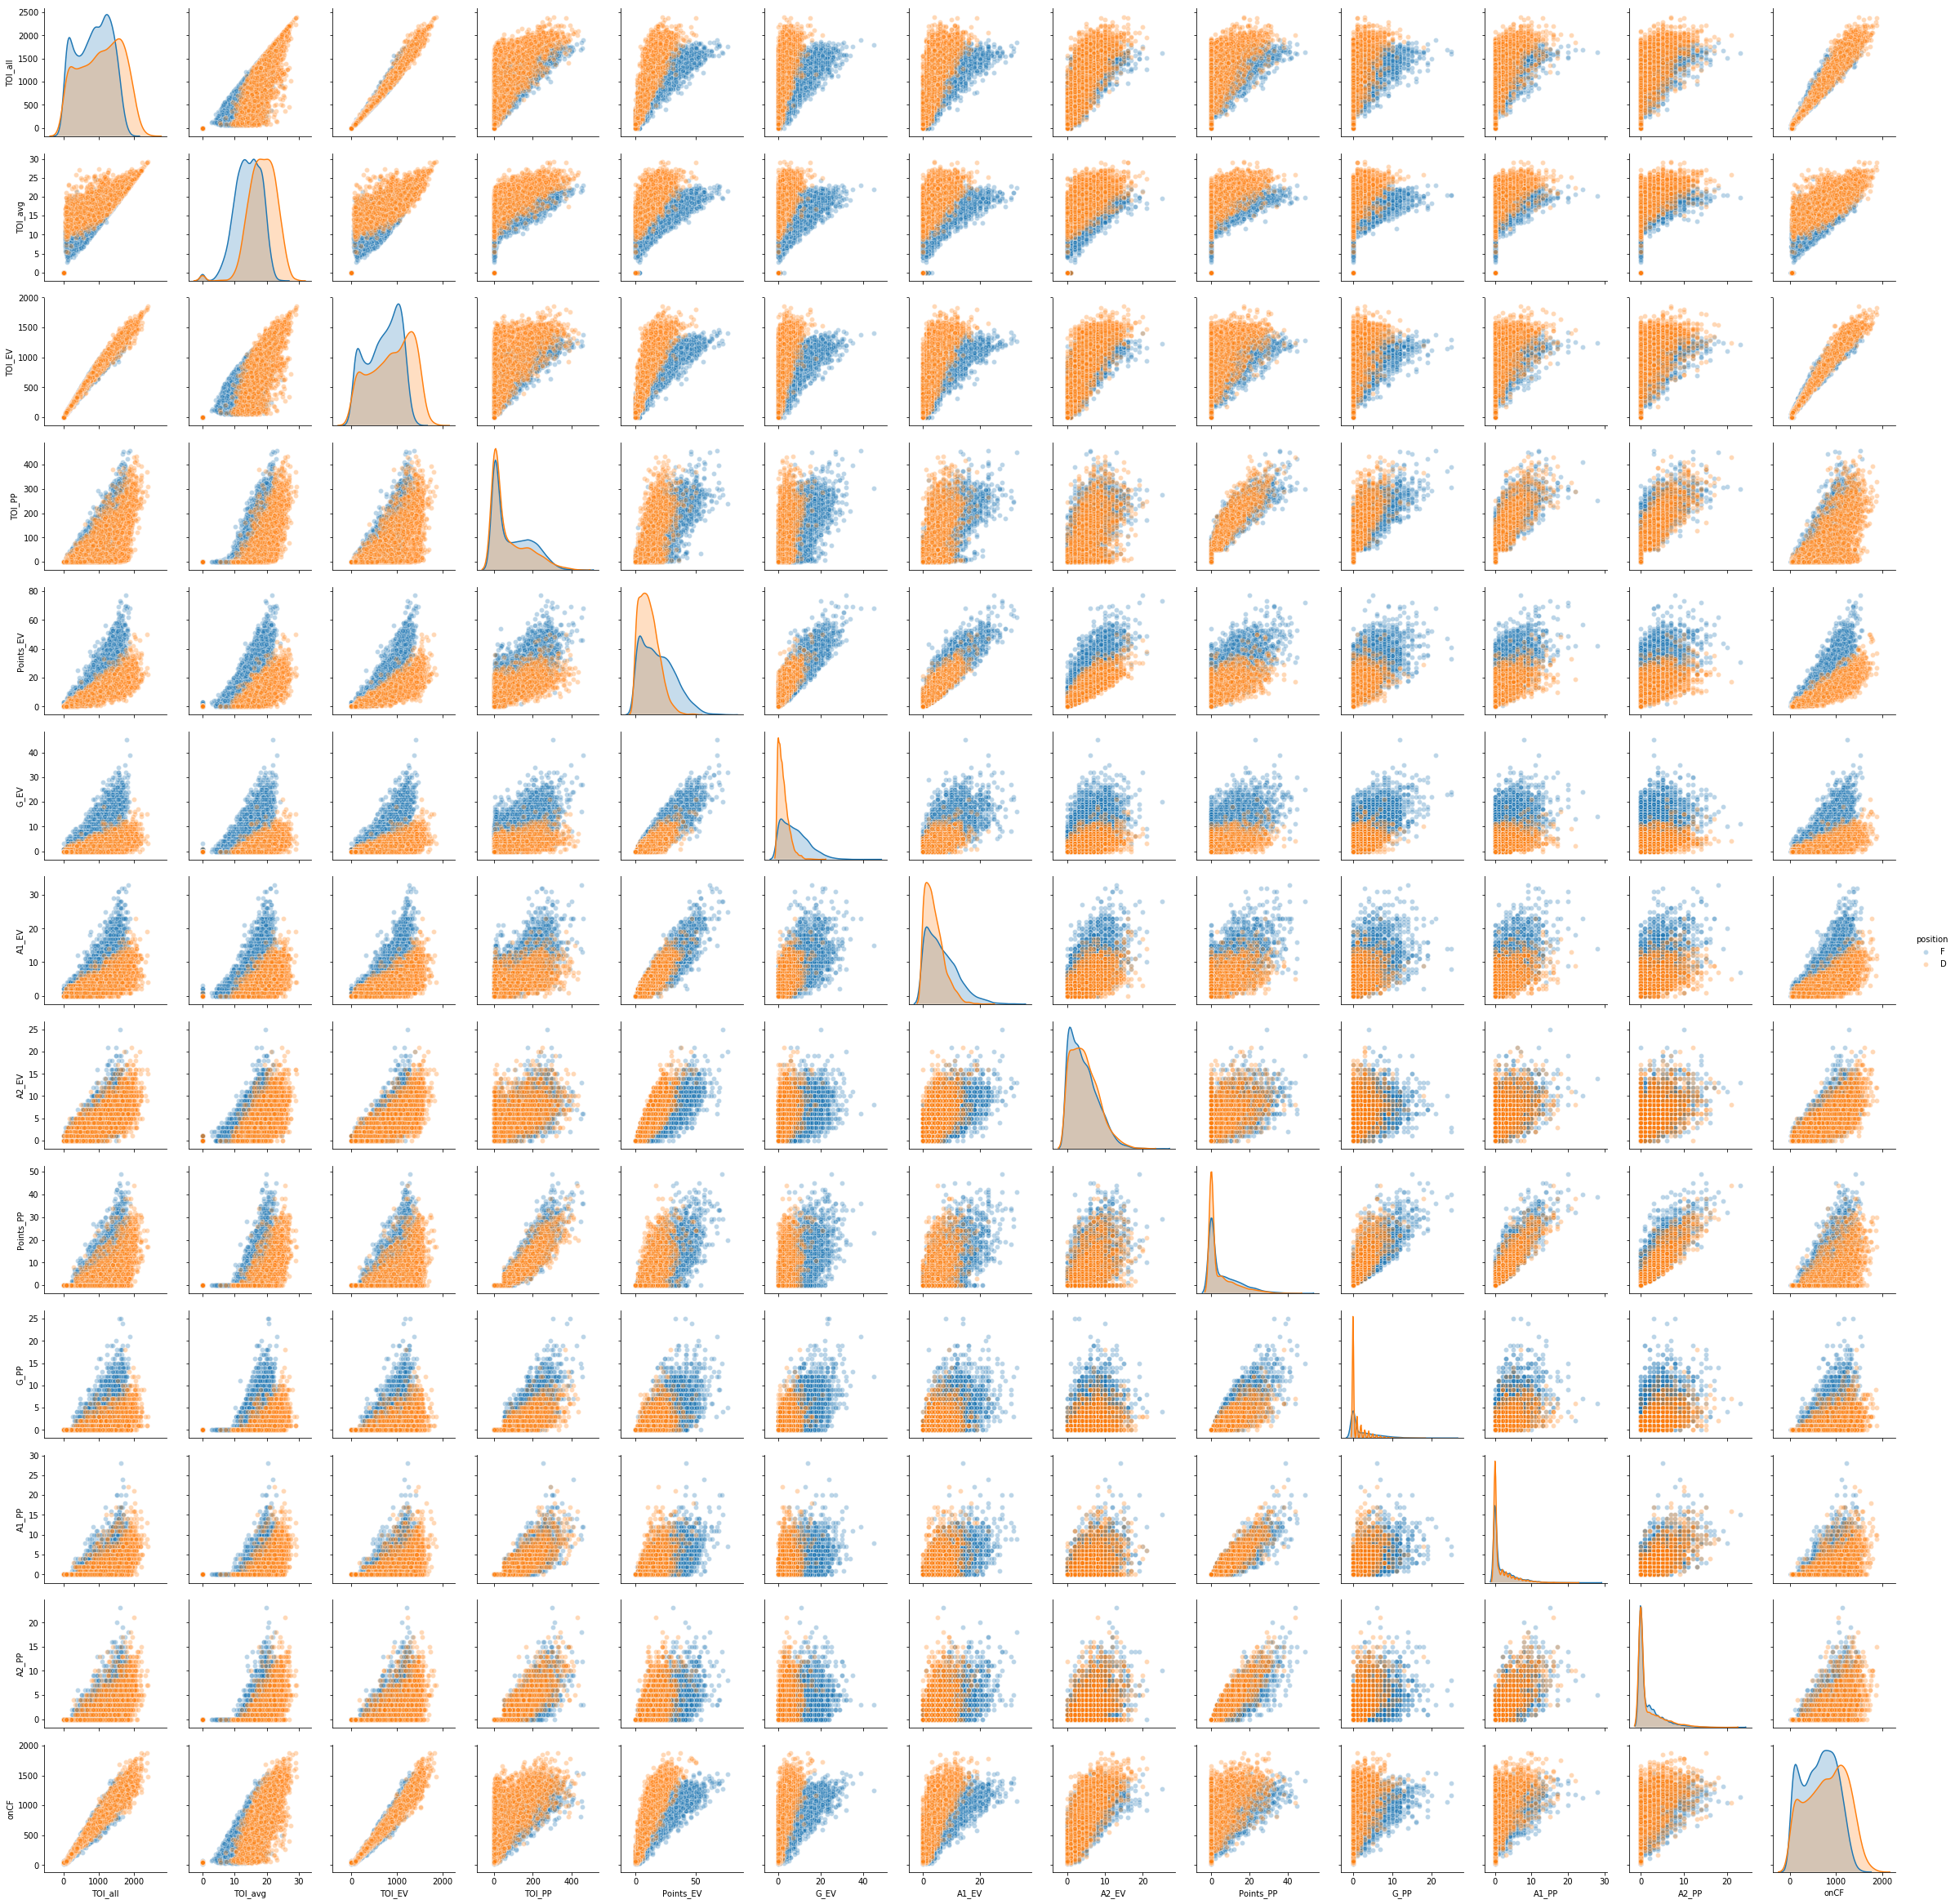

In [24]:
interesting_cols = ['TOI_all','TOI_avg','TOI_EV','TOI_PP','Points_EV','G_EV','A1_EV','A2_EV','Points_PP','G_PP','A1_PP','A2_PP','onCF']
sns.pairplot(game_stats, x_vars = interesting_cols, y_vars = interesting_cols, hue = 'position', plot_kws = {'alpha':0.3})
plt.show()

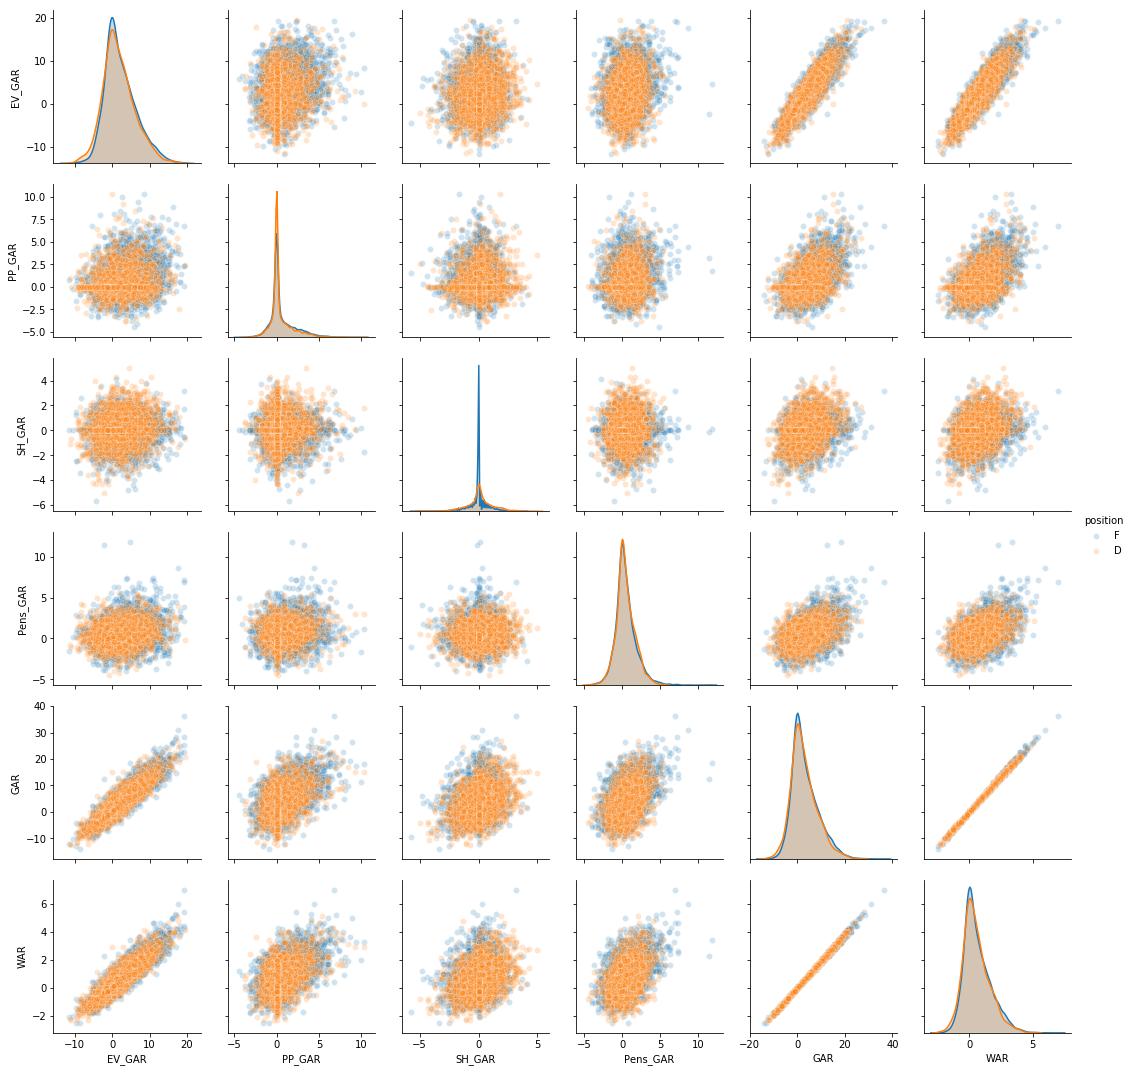

In [27]:
interesting_cols = ['EV_GAR', 'PP_GAR', 'SH_GAR', 'Pens_GAR', 'GAR', 'WAR']
sns.pairplot(game_stats, x_vars = interesting_cols, y_vars = interesting_cols, hue = 'position', plot_kws = {'alpha':0.2})
plt.show()

In [5]:
contract_stats = pd.read_csv('./data/contract_stats_matched.csv')
contract_features = list(contract_stats.columns)
n_cols = len(contract_features)
print('---------------------')
print('ALL CONTRACT FEATURES')
print('---------------------')
for ii in range(n_cols):
    print(contract_features[ii])


---------------------
ALL CONTRACT FEATURES
---------------------
name
signing_date
signing_age
signing_status
contract_type
length
cap_hit_pct
player_id


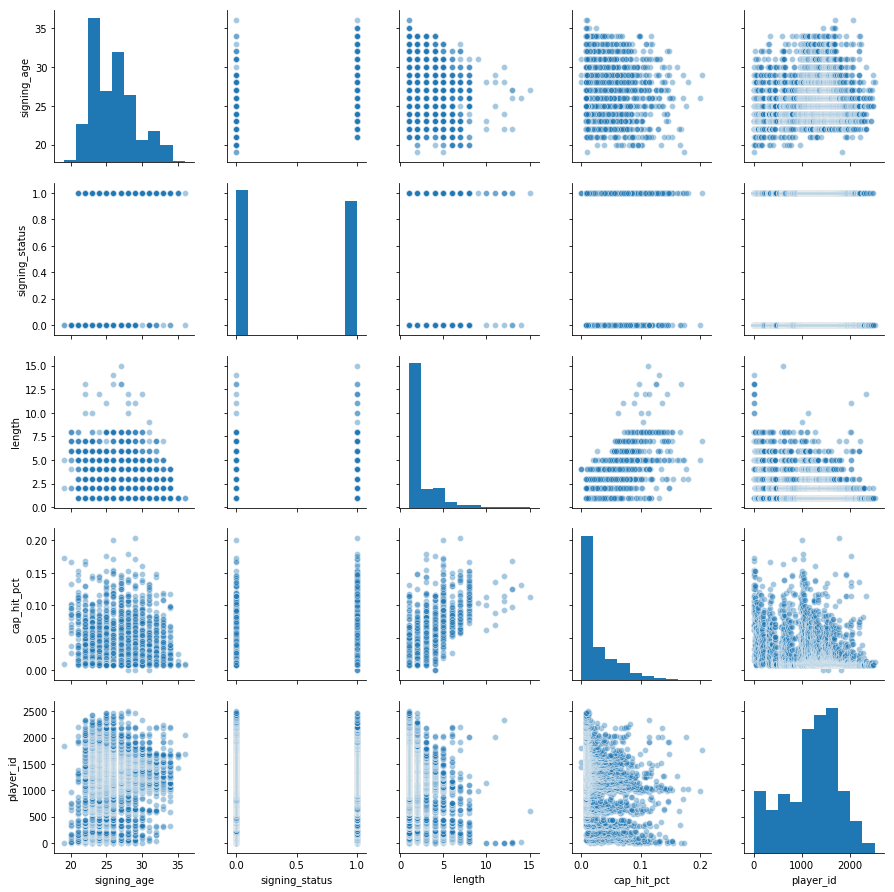

In [35]:
sns.pairplot(contract_stats, plot_kws={'alpha':0.4})
plt.show()

In [6]:
player_stats = pd.read_csv('./data/player_stats_matched.csv')
player_features = list(player_stats.columns)
n_cols = len(player_features)
print('-------------------')
print('ALL PLAYER FEATURES')
print('-------------------')
for ii in range(n_cols):
    print(player_features[ii])

-------------------
ALL PLAYER FEATURES
-------------------
player
team
date_of_birth
age
handed
center
left_wing
right_wing
defense
player_id


In [7]:
contract_player = contract_stats.merge(player_stats, how='left', on='player_id')

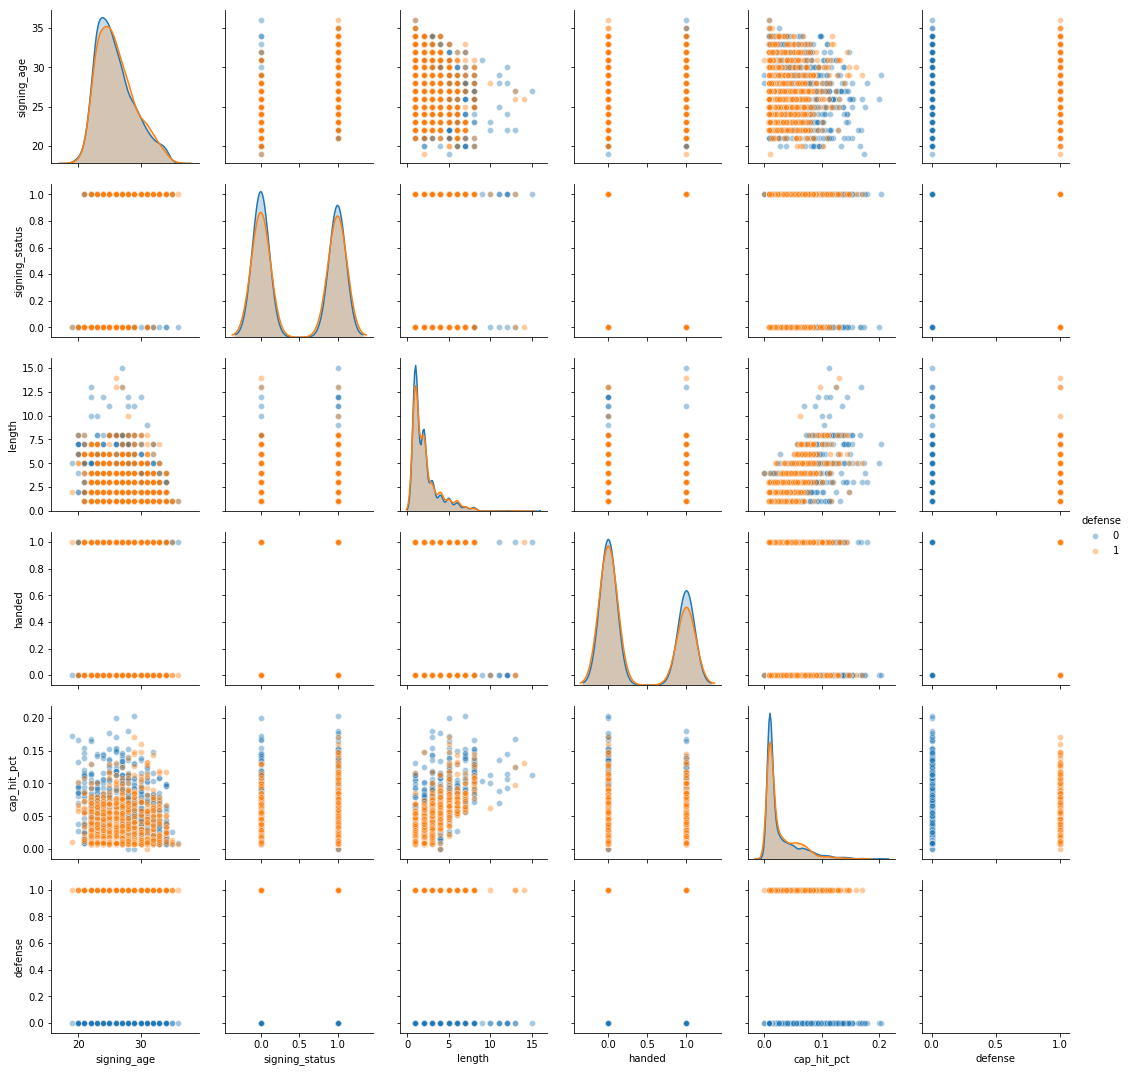

In [40]:
cols = ['signing_age', 'signing_status', 'length', 'handed', 'cap_hit_pct', 'defense']
sns.pairplot(contract_player, x_vars = cols, y_vars = cols, hue = 'defense', plot_kws={'alpha':0.4})
plt.show()

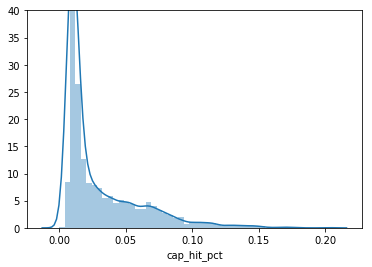

In [46]:
sns.distplot(contract_stats.cap_hit_pct, norm_hist=True)
plt.ylim([0, 40])
plt.show()

C:\Users\linds\Anaconda3\envs\datascience\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\linds\Anaconda3\envs\datascience\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\linds\Anaconda3\envs\datascience\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


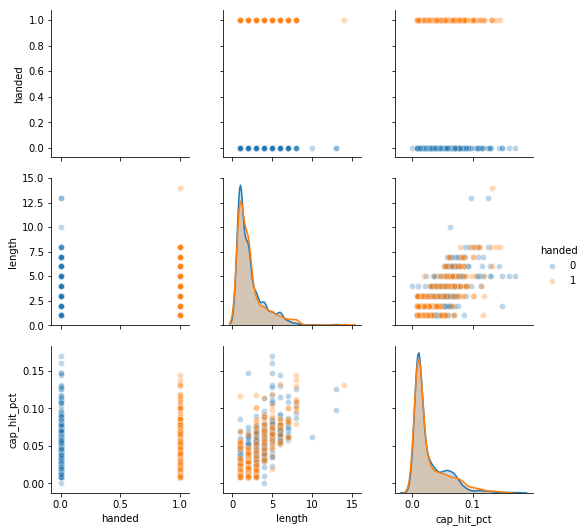

In [15]:
interest_vars = ['handed', 'length', 'cap_hit_pct']
sns.pairplot(data = contract_player[contract_player.defense==1], 
             x_vars = ['handed', 'length', 'cap_hit_pct'], 
             y_vars = ['handed', 'length', 'cap_hit_pct'],
            plot_kws = {'alpha':0.3},
            hue = 'handed')
plt.show()

In [13]:
contract_player[contract_player.cap_hit_pct>0.19]

name    signing_date  signing_age  signing_status  \
1156  BRAD.RICHARDS   (23, 5, 2006)           26               0   
3455   JAROMIR.JAGR  (19, 10, 2001)           29               1   

          contract_type  length  cap_hit_pct  player_id         player team  \
1156  STANDARD CONTRACT       5       0.2000        993  BRAD.RICHARDS    -   
3455  STANDARD CONTRACT       7       0.2031       1766   JAROMIR.JAGR    -   

      date_of_birth   age  handed  center  left_wing  right_wing  defense  
1156   (2, 5, 1980)  30.0       0       1          1           0        0  
3455  (15, 2, 1972)  39.0       0       0          0           1        0